## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

In [ ]:
# write your code from here

Anomaly counts:
 anomaly_label
Normal     199
Anomaly     11
Name: count, dtype: int64

Sample anomalies:
         amount  transaction_time  account_age  anomaly anomaly_label
9    110.851201         23.558194    26.572194       -1       Anomaly
200  337.849431          3.654366     0.209526       -1       Anomaly
201  253.891734          2.944415     1.471468       -1       Anomaly
202  343.480296          3.279969     2.882024       -1       Anomaly
203  367.781893          1.874511     2.345420       -1       Anomaly


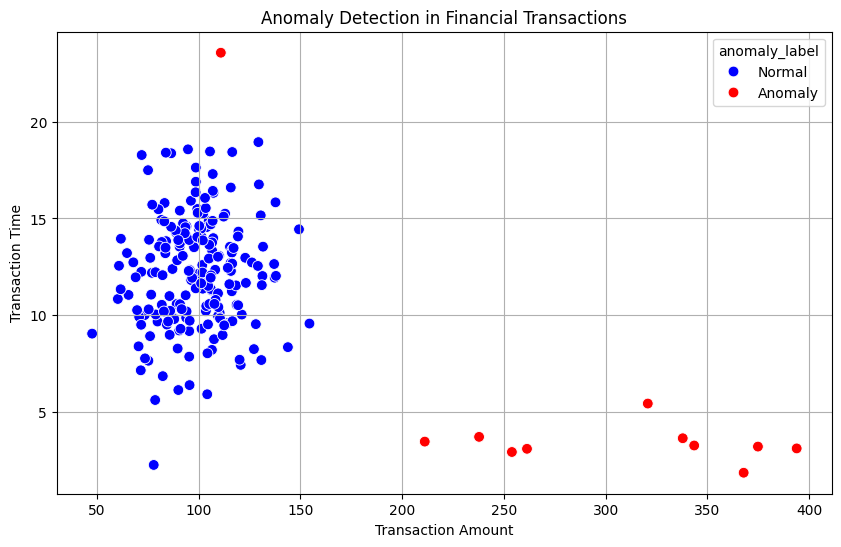

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# 1. Sample Financial Transactions Dataset
np.random.seed(42)

# Generate normal data
n_samples = 200
amount = np.random.normal(loc=100, scale=20, size=n_samples)
transaction_time = np.random.normal(loc=12, scale=3, size=n_samples)
account_age = np.random.normal(loc=24, scale=5, size=n_samples)

# Add anomalies
n_anomalies = 10
amount_anom = np.random.normal(loc=300, scale=50, size=n_anomalies)
transaction_time_anom = np.random.normal(loc=3, scale=1, size=n_anomalies)
account_age_anom = np.random.normal(loc=1, scale=1, size=n_anomalies)

# Combine into one dataset
data = {
    'amount': np.concatenate([amount, amount_anom]),
    'transaction_time': np.concatenate([transaction_time, transaction_time_anom]),
    'account_age': np.concatenate([account_age, account_age_anom])
}

df = pd.DataFrame(data)

# 2. Apply Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df[['amount', 'transaction_time', 'account_age']])
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# 3. Print Summary
print("Anomaly counts:\n", df['anomaly_label'].value_counts())
print("\nSample anomalies:")
print(df[df['anomaly_label'] == 'Anomaly'].head())

# 4. Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='amount',
    y='transaction_time',
    hue='anomaly_label',
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    s=60
)
plt.title("Anomaly Detection in Financial Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time")
plt.grid(True)
plt.show()
